# Westbound Traffic on the I-94: Key Indicators

An analysis using data collected by John Hogue, available here: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

We will analyze the dataset to determine indicators of heavy traffic on the I-94, such as time periods and weather. The traffic data in this project was catalogued hourly by MN DoT ATR station 301.

## Data Dictionary

 - `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
 - `temp` - Numeric Average temp in kelvin
 - `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
 - `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
 - `clouds_all` - Numeric Percentage of cloud cover
 - `weather_main` - Categorical Short textual description of the current weather
 - `weather_description` - Categorical Longer textual description of the current weather
 - `date_time` - DateTime Hour of the data collected in local CST time
 - `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
## import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#upload data file
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# print summary
print(metro.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


In [2]:
## data sample
metro.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


There are 9 columns and 48204 records in the Metro Interstate Traffic Volume dataset, with no null values. The collected data covers dates 10/2/2012 through 9/30/2018 and catalogs weather as well as holidays against dates/times to determine their impact on traffic.

### Converting Date_Time from String to Date

We need to convert this field to datetime before moving on. We will also get the min and max dates for our summary above.

In [3]:
## convert date_time column from string to datetime
## find min and max dates

metro['date_time'] = pd.to_datetime(metro['date_time'])
print('min date:',metro['date_time'].min())
print('max date:',metro['date_time'].max())

min date: 2012-10-02 09:00:00
max date: 2018-09-30 23:00:00


## Initial Distribution Analysis of Traffic Volume

Traffic ranges from 0 to 7280 cars with 0 and 5000 cars being the most frequently logged. On average there are 3259 cars observed each hour from the station.

There is no specific skew to our traffic volume histogram. We must dive a bit deeper into the data by looking at time of day.


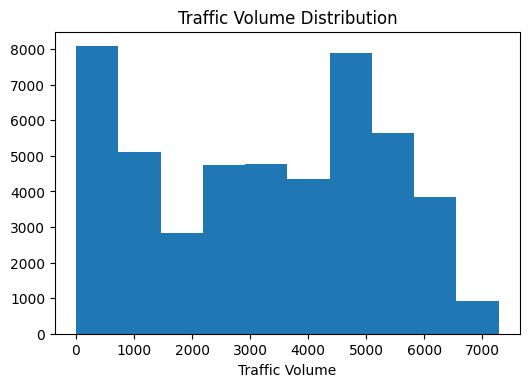

In [4]:
## plot traffic volume frequency
%matplotlib inline

plt.hist(metro['traffic_volume'])
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
## review statistical summary for traffic volume
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Daytime vs Nighttime Traffic

We want to observe potential differences in traffic for the daytime versus the nighttime. We add an `hour` column to the dataset and create separate variables to house daytime and nightime records. 

There are more daytime than nighttime records at 25838 versus 22366.

In [6]:
# create hour column in the dataset
metro['hour'] = metro['date_time'].dt.hour

In [7]:
# create daytime dataset
day = metro[metro['hour'].between(7,19)]
print(day.shape)

(25838, 10)


In [8]:
# create nighttime dataset
night = metro[(metro['hour'] >= 20) | (metro['hour'] <= 6)]
print(night.shape)

(22366, 10)


### Plotting Day and Nighttime Traffic

We plot two graphs side-by-side to compare times in traffic.

(0.0, 7000.0)

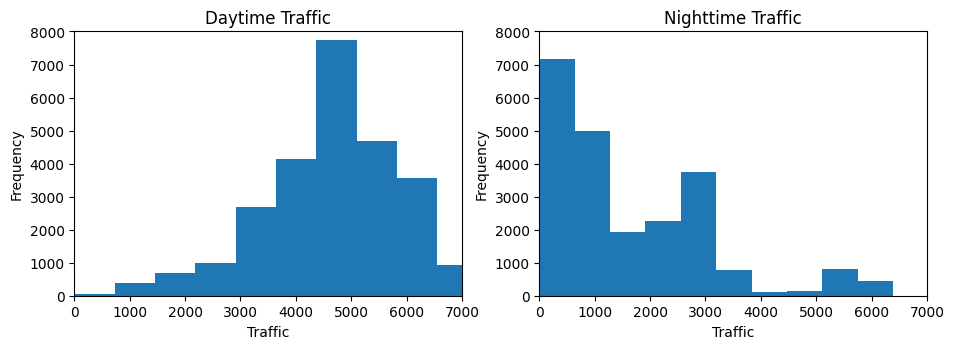

In [9]:
#create side-by-side graphs
plt.figure(figsize = [11,3.5])

#plot daytime traffic
plt.subplot (1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7000)

#plot nighttime traffic
plt.subplot (1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7000)

In [10]:
# get summary statistics for daytime
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
# get summary statistics for nighttime
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

Daytime traffic has a left skew with 4649 cars in traffic on average. The bulk of data falls between 4000 and 6000 car traffic.

There is far less traffic at night as seen by the right skew of nighttime data. On average there are 1654 cars on the road, and 75% of records are 2630 cars or lower.

## Observing Daytime Traffic by Month

First we create a `month` field in our daytime dataset. Then we aggregate mean traffic data by month in the `by_month` variable.

In [12]:
# create month column in daytime data
day['month'] = day['date_time'].dt.month

# aggregate mean traffic volume by month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-12-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

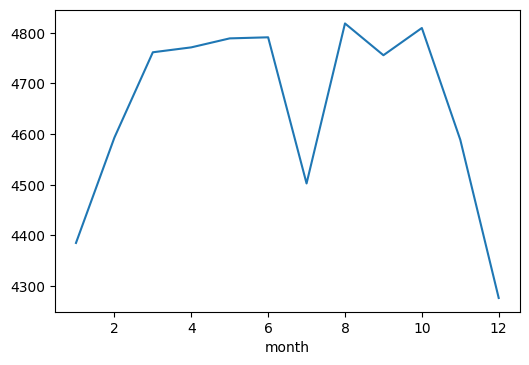

In [20]:
# plot monthly traffic volume
by_month['traffic_volume'].plot.line()
plt.show()

We see here that January, July, and December have the lowest average monthly traffic. Traffic typically subsides in colder months and increases in warmer months, excluding July.

Next, we should review daytime traffic by the day of the week to observe potential patterns.

## Reviewing Daytime Traffic by Day of Week

First we add a weekday column to our daytime traffic dataset. Then we calculate mean traffic by day to use in a line plot.

In [21]:
# create day of week column in daytime data
day['dayofweek'] = day['date_time'].dt.dayofweek

# aggregate mean traffic volume by day of week
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-21-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

([<matplotlib.axis.XTick at 0x7ff0ea16b580>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

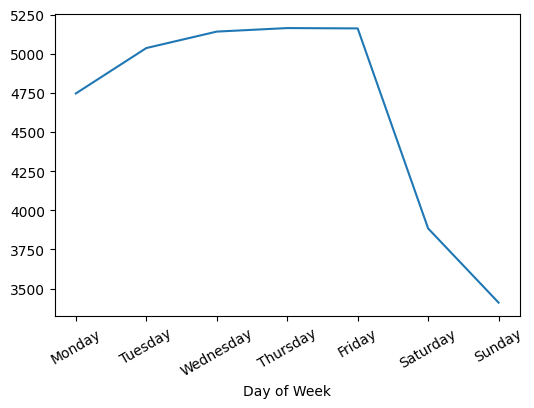

In [27]:
# plot daily traffic volume
by_dayofweek['traffic_volume'].plot.line()
plt.xlabel('Day of Week')
# relabel x axis
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=30)

We see that traffic is much higher, on average, throughout the typical workweek. Traffic tapers down for the weekend.

## Reviewing Hourly Traffic Split by Business and Weekend Days

First we add an `hour` column to our daytime data, then we split our daytime data into weekend and business day sets. We generate line plots of average hourly traffic for each.

In [ ]:
# create hour column in daytime data
day['hour'] = day['date_time'].dt.hour

# create segment for business days/work week
business_days = day.copy()[day['dayofweek']<=4]#thru Friday

# create segment for weekend
weekend = day.copy()[day['dayofweek'] >=5]#Sat and Sun

# aggregate traffic data for workweek
by_hour_business = business_days.groupby('hour').mean()

# aggregate traffic data for weekend
by_hour_weekend = weekend.groupby('hour').mean()

# print summaries
print('business days by hour:', by_hour_business['traffic_volume'])
print('weekend by hour:',by_hour_weekend['traffic_volume'])

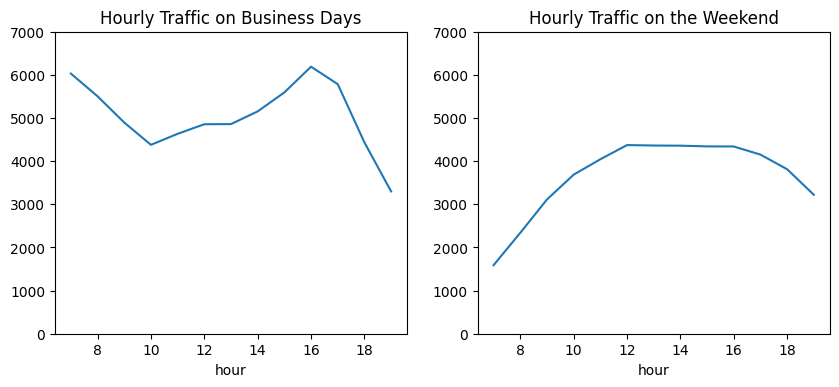

In [38]:
# create side-by-side charts
plt.figure(figsize = [10,4])

# create hourly chart for work week
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Hourly Traffic on Business Days')
plt.ylim(0,7000)

# create hourly chart for weekend
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Hourly Traffic on the Weekend')
plt.ylim(0,7000)
plt.show()

It appears that the rush hours are 7am and 4pm on business days. Traffic tends not to have spikes during the weekend; rather, traffic is low early in the morning and builds toward the afternoon and evening.

## Correlation between Traffic and Weather

We review the correlation between weather variables and traffic and find that `temp` has the strongest correlation of any weather variable at approximately +.12, which is actually a bit weak.

We generate a scatterplot to investigate further and conclude that temperature is not an indicator for traffic. Traffic is fairly consistent at all temperatures.

In [41]:
# calculate correlations for traffic volume
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
hour             -0.007369
month            -0.017397
dayofweek        -0.371023
Name: traffic_volume, dtype: float64

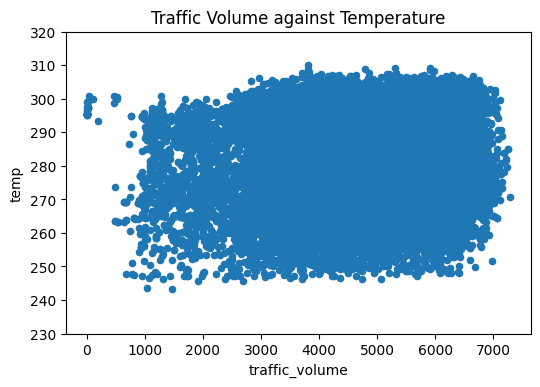

In [48]:
# plot traffic volume against temperature
day.plot.scatter('traffic_volume','temp')
plt.title('Traffic Volume against Temperature')
# customize y axis limits to better observe scatter
plt.ylim(230,320)
plt.show()

## Analyzing Weather Main and Weather Description

We want to observe traffic volume by main weather categories as well as detailed weather descriptions to further delve into key traffic indicators.

We aggregate mean traffic volume by each column accordingly.

In [51]:
# aggregate traffic volume by weather main column
by_weather_main = day.groupby('weather_main').mean()

# aggregate traffic volume by weather description column
by_weather_description = day.groupby('weather_description').mean()

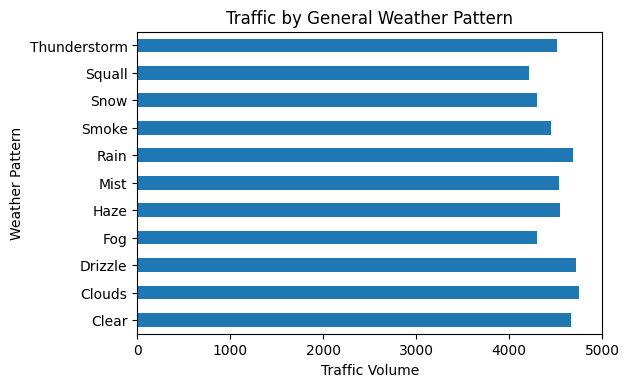

In [64]:
# plot traffic by weather main
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic by General Weather Pattern')
plt.ylabel('Weather Pattern')
plt.xlabel('Traffic Volume')
plt.xlim(0,5000)
plt.show()

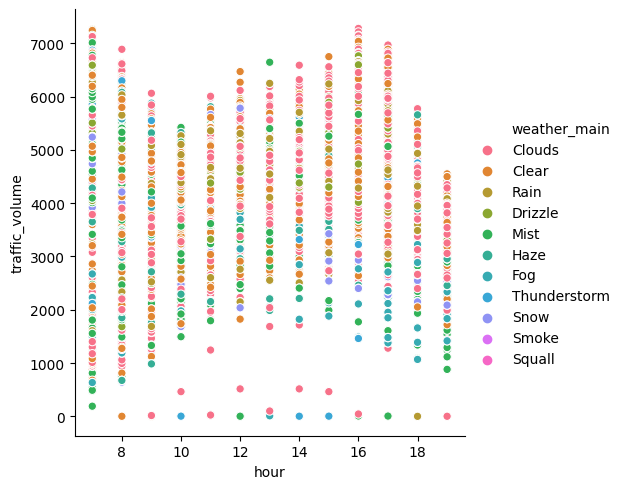

In [71]:
sns.relplot(data = day, x = 'hour', y = 'traffic_volume',hue='weather_main')

We see that there is slightly steeper traffic during drizzle and cloudy weather. Traffic is particularly low during squalls, snow and fog. We see that from 5-8pm, when people commute from work, there are lower traffic volumes for foggy and misty weather patterns.

Next, we look at detailed weather descriptions to further inform our analysis.

Text(0.5, 0, 'Traffic Volume')

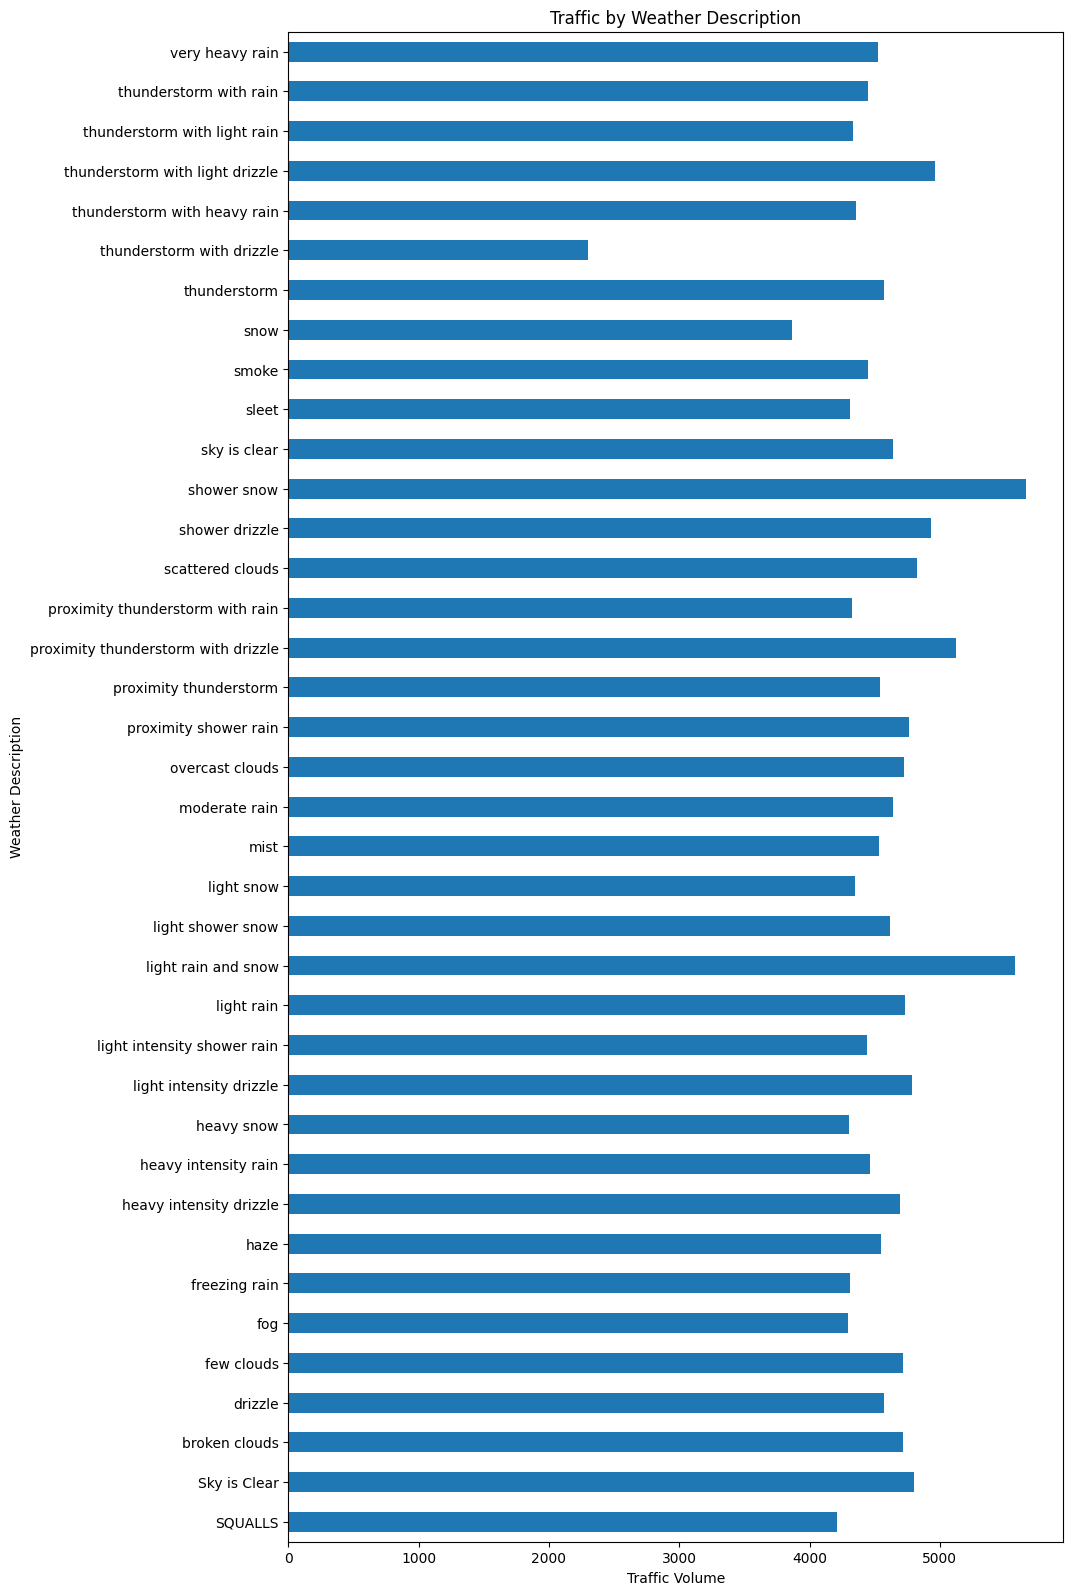

In [63]:
# plot traffic by weather description
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))
plt.title('Traffic by Weather Description')
plt.ylabel('Weather Description')
plt.xlabel('Traffic Volume')

On average, shower storms and light rain and snow appear to be heavy traffic indicators at more than 5000 cars. It is interesting that these weather patterns have heavier traffic on average than more severe or visually disrupting weather patterns, such as fog, but perhaps that's because rain and light snow are simultaneously drivable and unpleasant for bike or pedestrian commutes.

## Conclusions

 After trawling through the data, we are able to draw the following conclusions regarding key indicators of heavy traffic:
 
TIME PERIODS
 - Traffic is heavier during the day (7am-7pm) than at night
 - Traffic is more prolific during the workweek than the weekend
 - Traffic is heavier in warmer months, excluding July
 
WEATHER PATTERNS
 - Temperature has no bearing on traffic
 - Traffic is heavier during shower storms and light snow/rain
 - Traffic is lighter during home-commute hours when the weather is foggy or misty